In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)

In [3]:
# Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Entity                                  6840 non-null   object
 1   Code                                    6840 non-null   object
 2   Year                                    6840 non-null   int64 
 3   Meningitis fatalities                   6840 non-null   int64 
 4   Dementia fatalities                     6840 non-null   int64 
 5   Parkinson fatalities                    6840 non-null   int64 
 6   Nutritional deficiency fatalities       6840 non-null   int64 
 7   Malaria fatalities                      6840 non-null   int64 
 8   Drowning fatalities                     6840 non-null   int64 
 9   Interpersonal violence fatalities       6840 non-null   int64 
 10  Maternal disorder fatalities       

In [4]:
df.columns = df.columns.str.replace(' fatalities', '')
df_numeric = df.drop(['Year'], axis=1).select_dtypes(include=[np.number])
print(df.describe())

              Year     Meningitis      Dementia      Parkinson  \
count  6840.000000    6840.000000  6.840000e+03    6840.000000   
mean   2004.500000    8213.149561  2.736319e+04    6493.627339   
std       8.656074   34982.933895  1.113146e+05   25767.447063   
min    1990.000000       0.000000  0.000000e+00       0.000000   
25%    1997.000000      19.000000  1.287500e+02      37.000000   
50%    2004.500000     150.500000  8.455000e+02     209.000000   
75%    2012.000000    1622.250000  4.251000e+03     984.000000   
max    2019.000000  432524.000000  1.623276e+06  362907.000000   

       Nutritional deficiency        Malaria       Drowning  \
count             6840.000000    6840.000000    6840.000000   
mean             11006.353947   18903.160234    8619.055117   
std              48289.687100   97346.780570   35879.406010   
min                  0.000000       0.000000       0.000000   
25%                 11.000000       0.000000      39.000000   
50%                159.0000

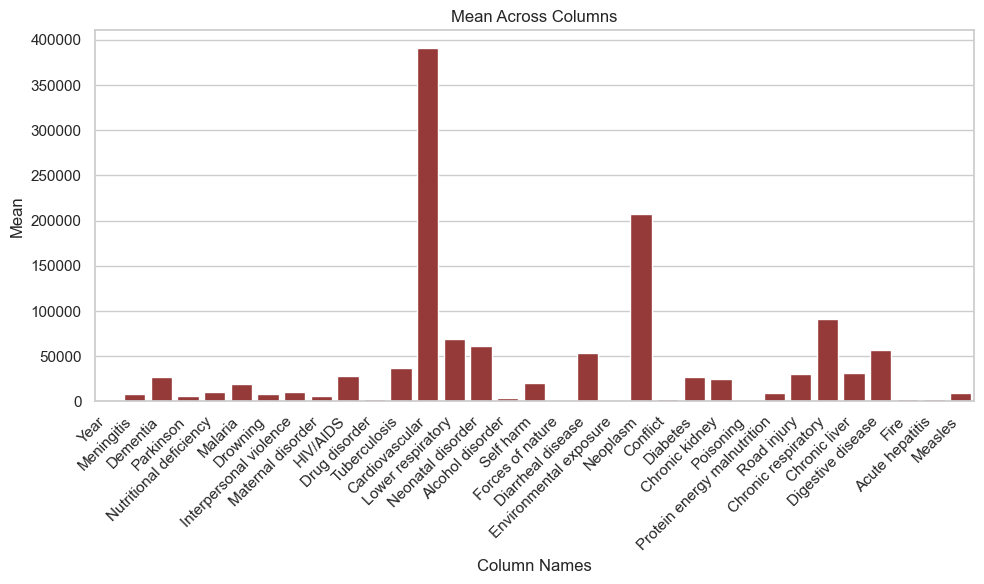

In [5]:
# Set up the style for Seaborn
sns.set(style="whitegrid")

# Transpose the describe() result for easier plotting
describe_df = df.describe().T

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=describe_df.index, y='mean', data=describe_df, color='Brown')
plt.title('Mean Across Columns')
plt.xlabel('Column Names')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
print(df.describe().T)

                              count           mean           std     min  \
Year                         6840.0    2004.500000  8.656074e+00  1990.0   
Meningitis                   6840.0    8213.149561  3.498293e+04     0.0   
Dementia                     6840.0   27363.188158  1.113146e+05     0.0   
Parkinson                    6840.0    6493.627339  2.576745e+04     0.0   
Nutritional deficiency       6840.0   11006.353947  4.828969e+04     0.0   
Malaria                      6840.0   18903.160234  9.734678e+04     0.0   
Drowning                     6840.0    8619.055117  3.587941e+04     0.0   
Interpersonal violence       6840.0   10636.648684  4.088879e+04     0.0   
Maternal disorder            6840.0    6131.066959  2.635521e+04     0.0   
HIV/AIDS                     6840.0   28141.249415  1.391973e+05     0.0   
Drug disorder                6840.0    2449.070760  1.038417e+04     0.0   
Tuberculosis                 6840.0   37153.226608  1.595721e+05     0.0   
Cardiovascul

In [7]:
variance = df_numeric.var()
std_deviation = df_numeric.std()
print(variance,"\n\n",std_deviation)

Meningitis                     1.223806e+09
Dementia                       1.239094e+10
Parkinson                      6.639613e+08
Nutritional deficiency         2.331894e+09
Malaria                        9.476396e+09
Drowning                       1.287332e+09
Interpersonal violence         1.671893e+09
Maternal disorder              6.945971e+08
HIV/AIDS                       1.937590e+10
Drug disorder                  1.078310e+08
Tuberculosis                   2.546325e+10
Cardiovascular                 2.274653e+12
Lower respiratory              6.783492e+10
Neonatal disorder              6.414121e+10
Alcohol disorder               2.983163e+08
Self harm                      6.581406e+09
Forces of nature               1.324495e+08
Diarrheal disease              5.808196e+10
Environmental exposure         4.258863e+07
Neoplasm                       6.617087e+11
Conflict                       3.147142e+08
Diabetes                       1.068643e+10
Chronic kidney                 9

Text(0, 0.5, 'Variance')

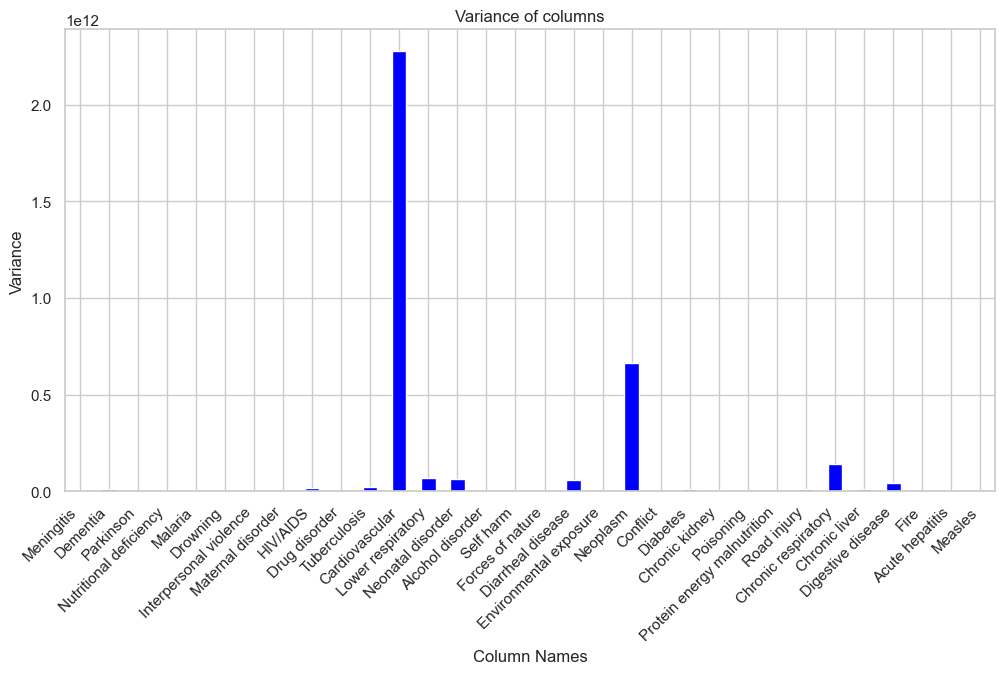

In [8]:

plt.figure(figsize=(12, 6))

variance.plot(kind='bar', color='blue')
plt.title('Variance of columns')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column Names')
plt.ylabel('Variance')

Text(0, 0.5, 'Standard deviation')

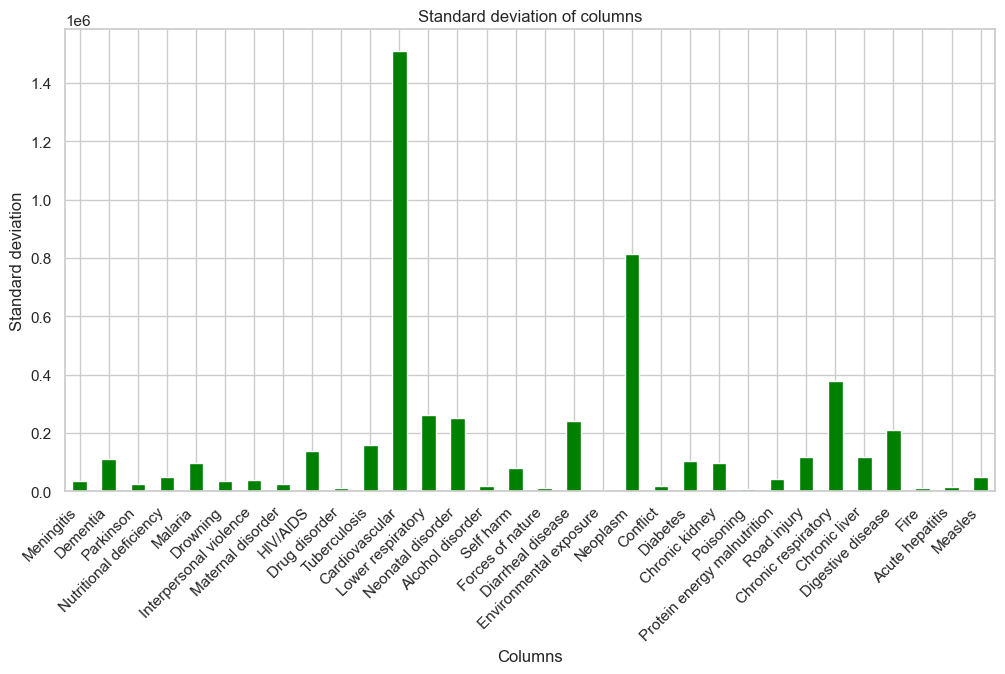

In [9]:
plt.figure(figsize=(12, 6))
std_deviation.plot(kind='bar', color='green')
plt.title('Standard deviation of columns')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Standard deviation')

In [10]:
# Loại bỏ các cột không phải số
df_numeric = df.drop(['Year'], axis=1).select_dtypes(include=[np.number])

# Tính hệ số tương quan
correlation_matrix = df_numeric.corr()

# In kết quả
print(correlation_matrix)

                             Meningitis  Dementia  Parkinson  \
Meningitis                     1.000000  0.531723   0.590434   
Dementia                       0.531723  1.000000   0.992060   
Parkinson                      0.590434  0.992060   1.000000   
Nutritional deficiency         0.937179  0.516379   0.572738   
Malaria                        0.921280  0.374969   0.413307   
Drowning                       0.793587  0.733680   0.796598   
Interpersonal violence         0.754517  0.805310   0.843961   
Maternal disorder              0.968088  0.551098   0.618997   
HIV/AIDS                       0.850084  0.482923   0.517327   
Drug disorder                  0.523271  0.911316   0.914278   
Tuberculosis                   0.937956  0.607396   0.678970   
Cardiovascular                 0.677707  0.942795   0.972522   
Lower respiratory              0.933671  0.760095   0.811487   
Neonatal disorder              0.958037  0.600462   0.670026   
Alcohol disorder               0.609272 

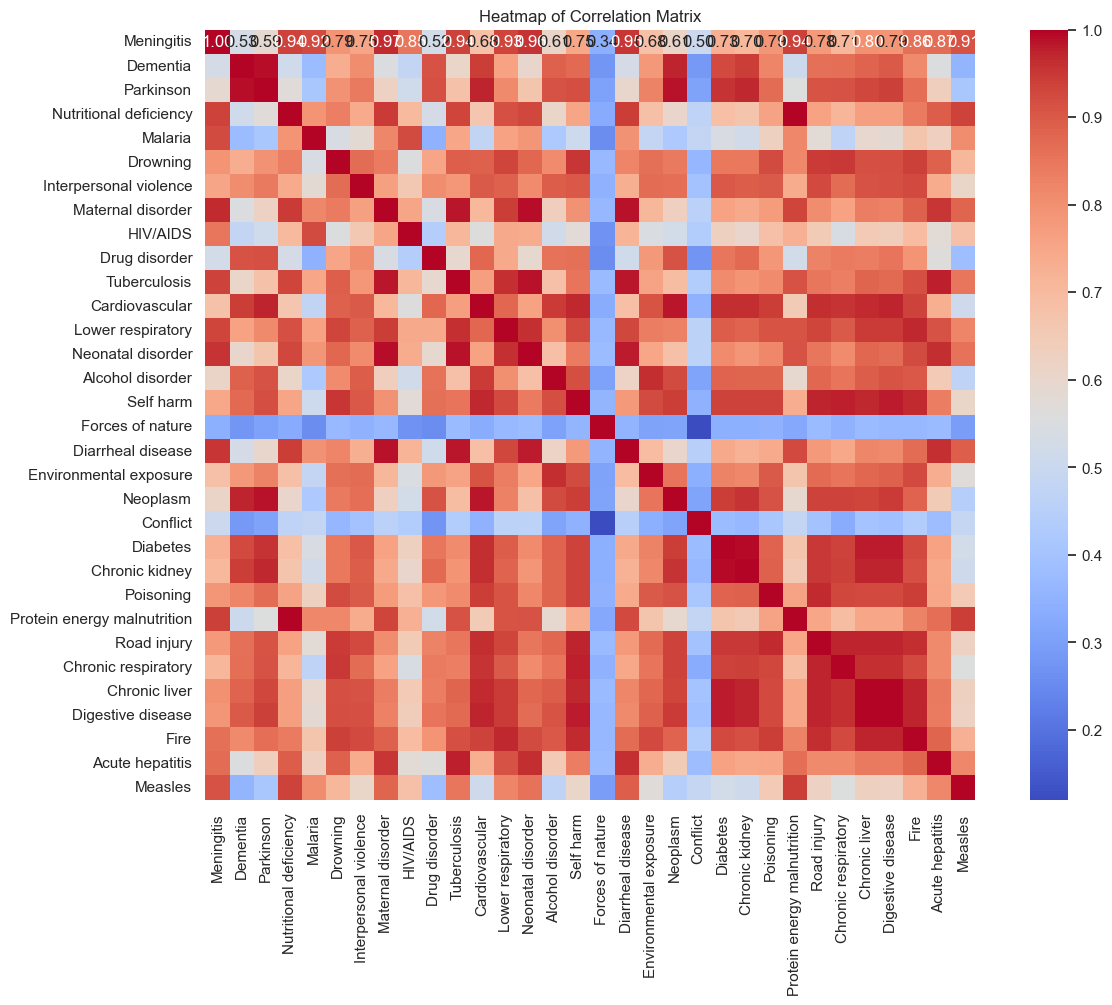

In [11]:
# Vẽ biểu đồ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [12]:
countries = df['Entity'].unique()
print("Các quốc gia có trong dataset:")
for country in countries:
    print(country)

Các quốc gia có trong dataset:
Afghanistan
African Region who
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote dIvoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Asia & Pacific wb
East Timor
Eastern Mediterranean Region who
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe & Central Asia wb
European Region who
Fiji
Finland
France
G20
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
GuineaBissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jorda

In [13]:
international_organizations = ["East Asia & Pacific wb",
                               "Eastern Mediterranean Region who",
                               "Europe & Central Asia wb",
                               "European Region who",
                               "Latin America & Caribbean wb",
                               "G20",
                               "Middle East & North Africa wb",
                               "North America wb",
                               "South Asia wb",
                               "SouthEast Asia Region who",
                               "SubSaharan Africa wb",
                               "Western Pacific Region who"]
print(len(international_organizations))

df_international_organizations = df[df['Entity'].isin(international_organizations)]
df_countries = df[~df['Entity'].isin(international_organizations)]
# Hiển thị kết quả
print(df_countries)

12
           Entity Code  Year  Meningitis  Dementia  Parkinson  \
0     Afghanistan  AFG  1990        2159      1116        371   
1     Afghanistan  AFG  1991        2218      1136        374   
2     Afghanistan  AFG  1992        2475      1162        378   
3     Afghanistan  AFG  1993        2812      1187        384   
4     Afghanistan  AFG  1994        3027      1211        391   
...           ...  ...   ...         ...       ...        ...   
6835     Zimbabwe  ZWE  2015        1439       754        215   
6836     Zimbabwe  ZWE  2016        1457       767        219   
6837     Zimbabwe  ZWE  2017        1460       781        223   
6838     Zimbabwe  ZWE  2018        1450       795        227   
6839     Zimbabwe  ZWE  2019        1450       812        232   

      Nutritional deficiency  Malaria  Drowning  Interpersonal violence  ...  \
0                       2087       93      1370                    1538  ...   
1                       2153      189      1391         

In [14]:
num_organizations = df_international_organizations['Entity'].nunique()
print("Số tổ chức quốc tế có trong dataset là:", num_organizations)
num_countries = df_countries['Entity'].nunique()
print("Số quốc gia có trong dataset là:", num_countries)

Số tổ chức quốc tế có trong dataset là: 12
Số quốc gia có trong dataset là: 216


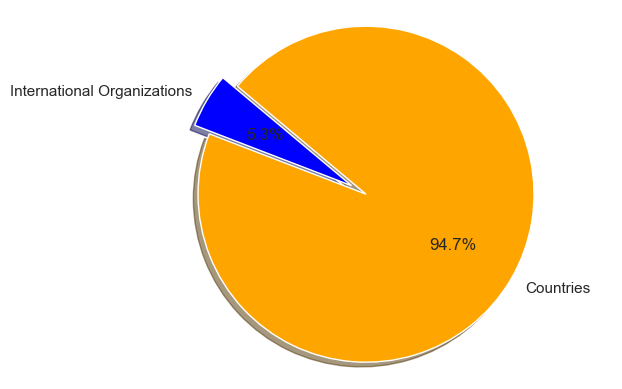

In [15]:
# Plot
plt.pie([num_organizations, num_countries], 
        explode=(0.1, 0), 
        labels=('International Organizations', 'Countries'), 
        colors=['blue', 'orange'], 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [16]:
numeric_columns = df.select_dtypes(include=["int64"]).columns

# Tiếp tục tính tổng số ca tử vong theo từng năm
total_deaths_per_year = df_countries.copy().drop(['Entity', 'Code'], axis=1)[numeric_columns]\
                                    .apply(pd.to_numeric, errors='coerce')\
                                    .groupby('Year')\
                                    .sum().sum(axis=1)

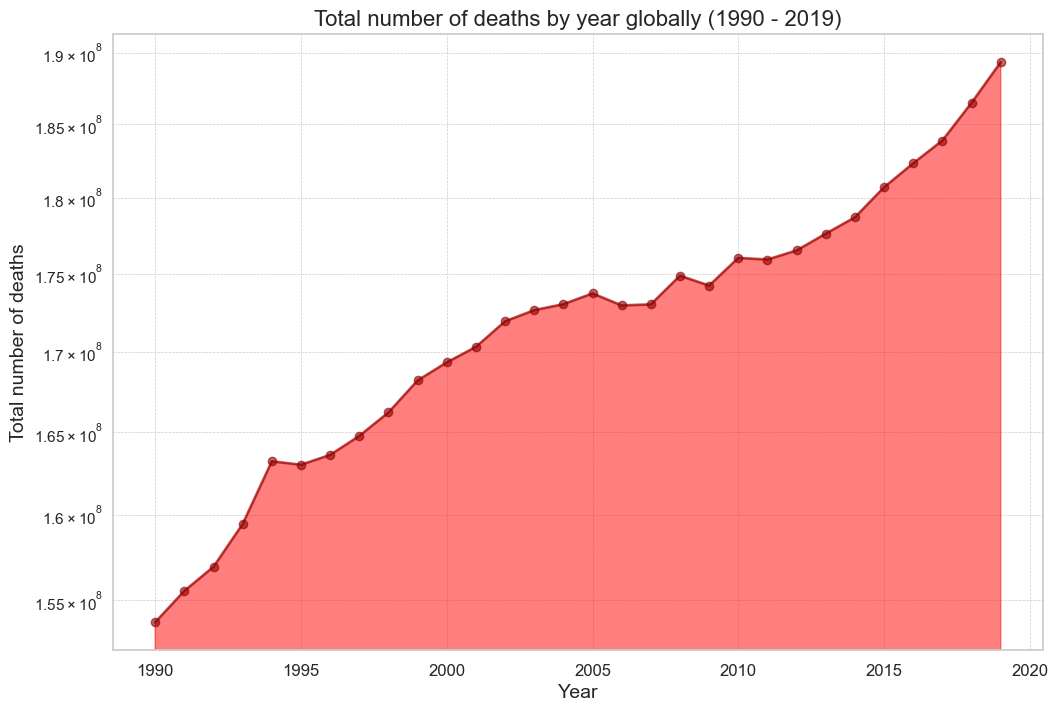

In [17]:

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
# Change color scheme and add markers
plt.fill_between(total_deaths_per_year.index, total_deaths_per_year.values, color="red", alpha=0.5)
plt.plot(total_deaths_per_year.index, total_deaths_per_year.values, color="darkred", alpha=0.6, linewidth=2, marker='o')
plt.yscale('log')  # Scale logarithmic cho trục y
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Total number of deaths by year globally (1990 - 2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total number of deaths', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

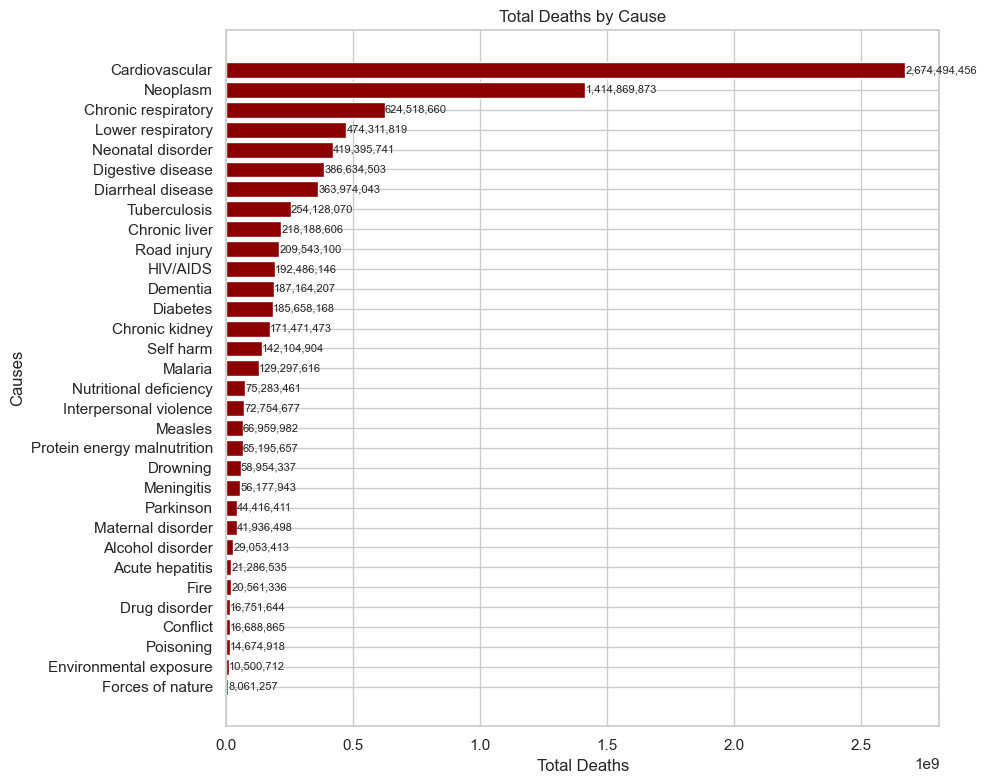

In [18]:
# Get data from DataFrame, remove unnecessary columns
df_causes = df.drop(['Entity', 'Code', 'Year'], axis=1)

# Calculate the total number of deaths for each cause and decrease the arrangement
total_deaths_by_cause = df_causes.sum().sort_values(ascending=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 8))
bars = plt.barh(total_deaths_by_cause.index, total_deaths_by_cause.values, color='darkred')

# Display the exact number on each column
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             '{:,}'.format(int(bar.get_width())), 
             va='center', ha='left', fontsize=8)

plt.title('Total Deaths by Cause')
plt.xlabel('Total Deaths')
plt.ylabel('Causes')
plt.tight_layout()
plt.show()

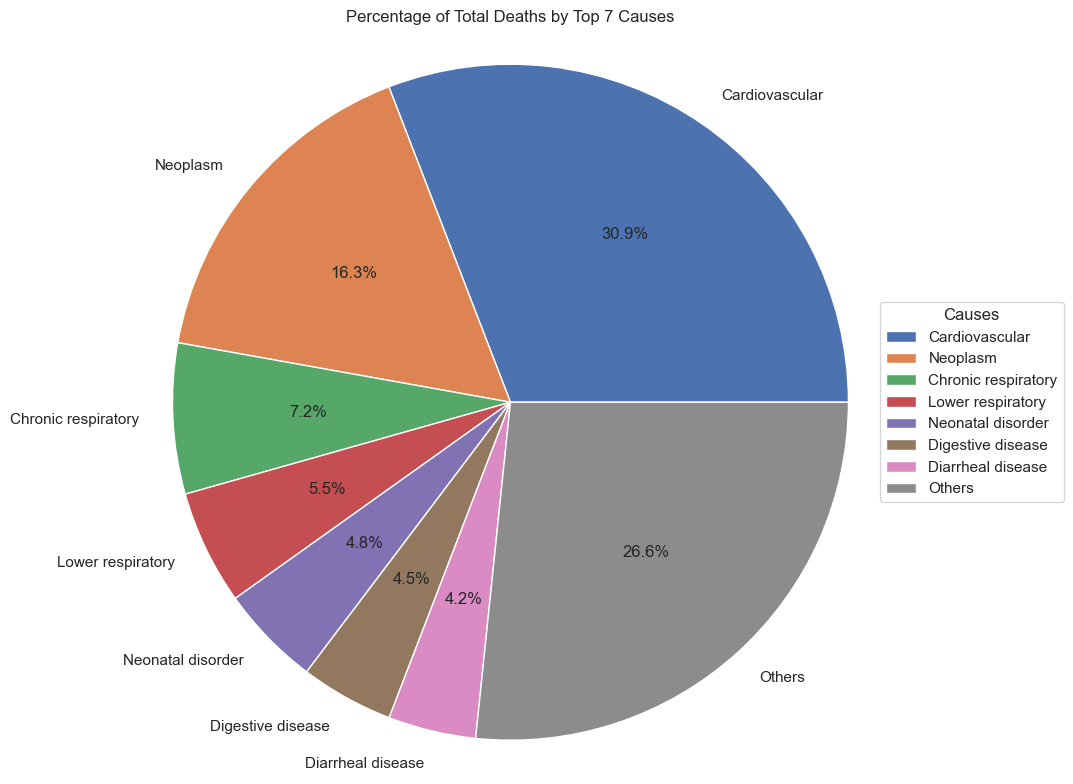

In [19]:


# Take 7 causes of the largest number of deaths
top_7_causes = total_deaths_by_cause.nlargest(7)

# Calculate the total number of deaths of the remaining causes
other_causes_total_deaths = total_deaths_by_cause.drop(top_7_causes.index).sum()

# Perfect the remaining causes into a "Others" group
top_7_causes['Others'] = other_causes_total_deaths

plt.figure(figsize=(10, 8))
plt.pie(top_7_causes, labels=top_7_causes.index, autopct='%1.1f%%', startangle=0)
plt.title('Percentage of Total Deaths by Top 7 Causes')
plt.axis('equal')
plt.legend(title="Causes", loc="center left", bbox_to_anchor=(1, 0, 0.7, 1))
plt.tight_layout()
plt.show()

In [20]:
vietnam_data = df_countries[df_countries["Code"]=="VNM"]

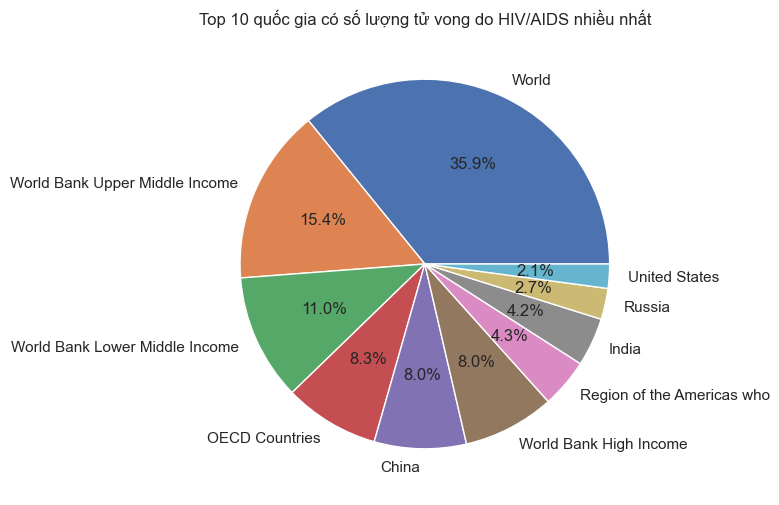

In [21]:
# Chọn nguyên nhân gây tử vong cần phân tích
cause_of_death = 'Cardiovascular'

# Tính tổng số ca tử vong do nguyên nhân đã chọn theo quốc gia
df_total_deaths = df_countries.groupby('Entity')[cause_of_death].sum()

# Lấy top 10 quốc gia có số ca tử vong nhiều nhất
top_10_countries = df_total_deaths.nlargest(10)

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%')
plt.title('Top 10 quốc gia có số lượng tử vong do HIV/AIDS nhiều nhất')
plt.show()

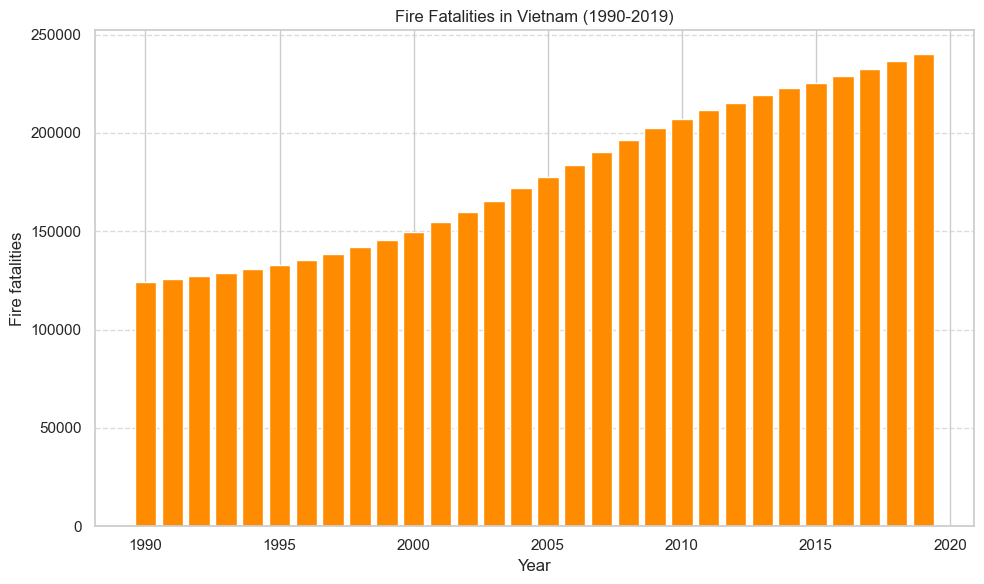

In [22]:
# Lấy dữ liệu của các vụ cháy (Fire fatalities)
fire_fatalities = vietnam_data["Cardiovascular"]

# Lấy dữ liệu của các năm
years = vietnam_data["Year"]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(years, fire_fatalities, color='darkorange')
plt.xlabel("Year")
plt.ylabel("Fire fatalities")
plt.title("Fire Fatalities in Vietnam (1990-2019)")
plt.xticks(rotation=0)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hiển thị lưới cho trục y
plt.tight_layout()  # Đảm bảo layout của biểu đồ được hiển thị đầy đủ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_83384\3947328362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_83384\3947328362.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Cardiovascular', hue='Entity', ci=None)


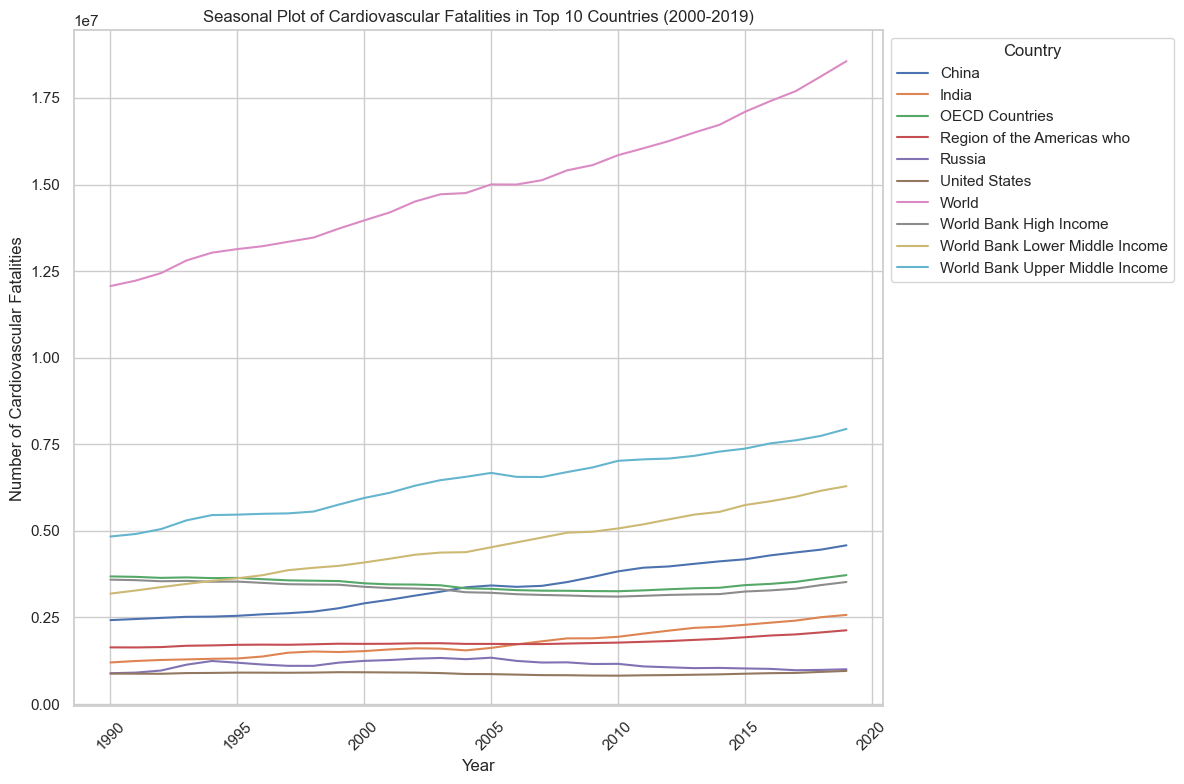

In [23]:

# Lấy 10 quốc gia có số ca Cardiovascular fatalities cao nhất
top_countries = df_countries.groupby('Entity')['Cardiovascular'].sum().nlargest(10).index

# Lọc dữ liệu cho các quốc gia đó từ năm 2000 đến 2019
data = df_countries[(df_countries['Year'] >= 1990) & (df_countries['Year'] <= 2019) & df_countries['Entity'].isin(top_countries)]

# Chuyển cột 'Year' thành kiểu dữ liệu số nguyên
data['Year'] = data['Year'].astype(int)

# Tạo Seasonal Plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Year', y='Cardiovascular', hue='Entity', ci=None)
plt.title('Seasonal Plot of Cardiovascular Fatalities in Top 10 Countries (2000-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Cardiovascular Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

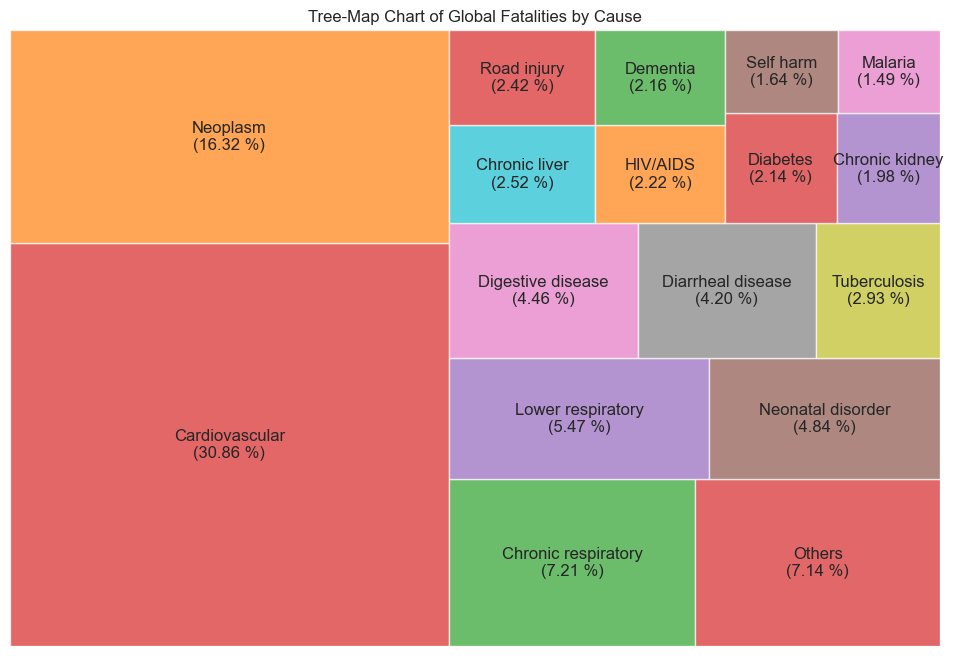

In [24]:
import squarify
# Define a custom color palette
colors = ['#d92626', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Calculate total number of deaths
total_deaths = total_deaths_by_cause.sum()

# Calculate percentages and filter causes with less than 1%
percentages = total_deaths_by_cause / total_deaths * 100
filtered_percentages = percentages[percentages >= 1]

# Calculate the percentage of "others"
others_percentage = percentages[percentages < 1].sum()

# Create a modified dictionary with only top causes and "others"
modified_deaths_by_cause = filtered_percentages.to_dict()
modified_deaths_by_cause['Others'] = others_percentage

# Sort the modified dictionary by values in descending order
sorted_modified_deaths_by_cause = dict(sorted(modified_deaths_by_cause.items(), 
                                              key=lambda item: item[1], reverse=True))

# Modify labels to include "Others"
labels = [f"{str(cause).replace(' fatalities','')}\n({percent:.2f} %)" 
          if cause != 'Others' else f"Others\n({percent:.2f} %)" for cause, percent in sorted_modified_deaths_by_cause.items()]

# Draw Tree-Map Chart with percentage on each rectangle
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sorted_modified_deaths_by_cause.values(), label=labels, alpha=0.7, color=colors)
plt.title('Tree-Map Chart of Global Fatalities by Cause')
plt.axis('off')
plt.show()

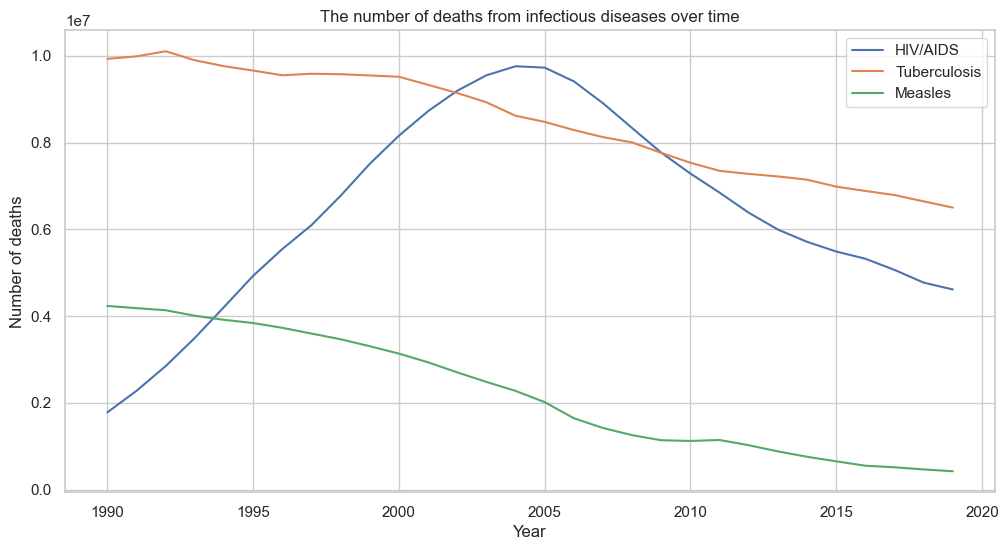

In [25]:
# Select columns related to infectious diseases
infectious_diseases = ['HIV/AIDS', 'Tuberculosis', 'Measles']

# Calculate the total number of deaths due to each type of infectious disease
df_infectious = df.groupby('Year')[infectious_diseases].sum()

plt.figure(figsize=(12, 6))
for disease in infectious_diseases:
    plt.plot(df_infectious.index, df_infectious[disease], label=disease)

plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.title('The number of deaths from infectious diseases over time')
plt.legend()
plt.grid(True)
plt.show()

# Based on the chart above, we can see:

- HIV/AIDS: The number of HIV/AIDS deaths increased sharply from 1990 to around 2005, then decreased but still maintained at a high level. This shows that HIV/AIDS is a big problem and needs to be solved effectively.

- TB: The number of deaths due to tuberculosis increased slightly from 1990 to around 2000, then gradually decreased and maintained low. This shows that medical and accessible measures may have contributed to reducing the number of tuberculosis deaths.

- Measles: The number of measles deaths decreased continuously since 1990 and maintained a very low level around 2020. This shows that immunization programs may have helped control measles effectively.

In short, the chart shows that HIV/AIDS is the main cause of a large number of deaths during this period. Meanwhile, the number of deaths from tuberculosis and measles has decreased significantly, possibly due to improvement in access to treatment and vaccination programs. However, it is necessary to continue monitoring to better understand the trend of HIV/AIDS in the future.

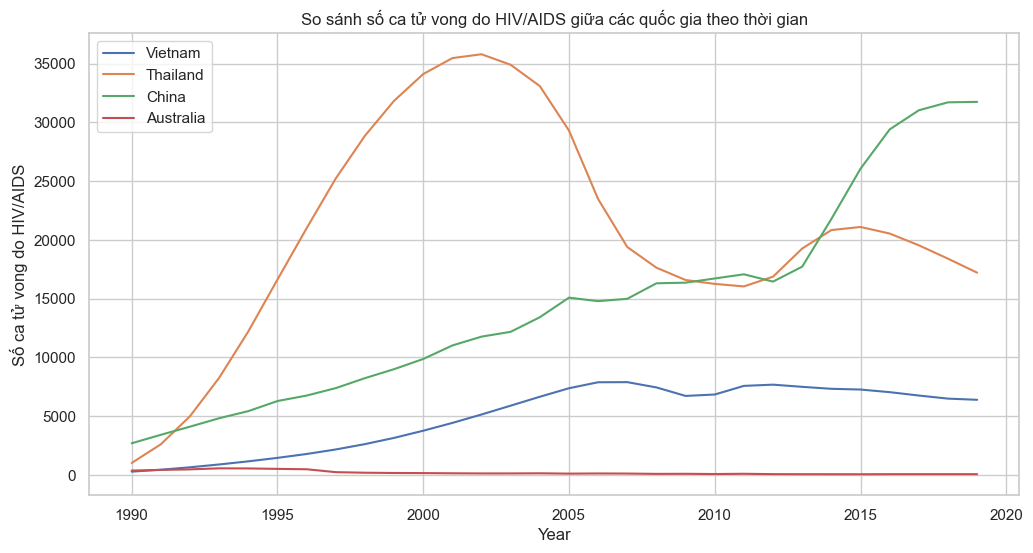

In [26]:
countries = ['Vietnam', 'Thailand', 'China','Australia']

# Choose the cause of death to analyze
cause_of_death = 'HIV/AIDS'

# Create new dataframe contains necessary information
df_countries_selected = df_countries[df_countries['Entity'].isin(countries) & (df_countries['Year'] >= 1990)]


plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries_selected[df_countries_selected['Entity'] == country]
    plt.plot(data['Year'], data[cause_of_death], label=country)

plt.xlabel('Year')
plt.yscale('linear')
plt.ylabel('Số ca tử vong do HIV/AIDS')
plt.title('So sánh số ca tử vong do HIV/AIDS giữa các quốc gia theo thời gian')
plt.legend()
plt.grid(True)
plt.show()

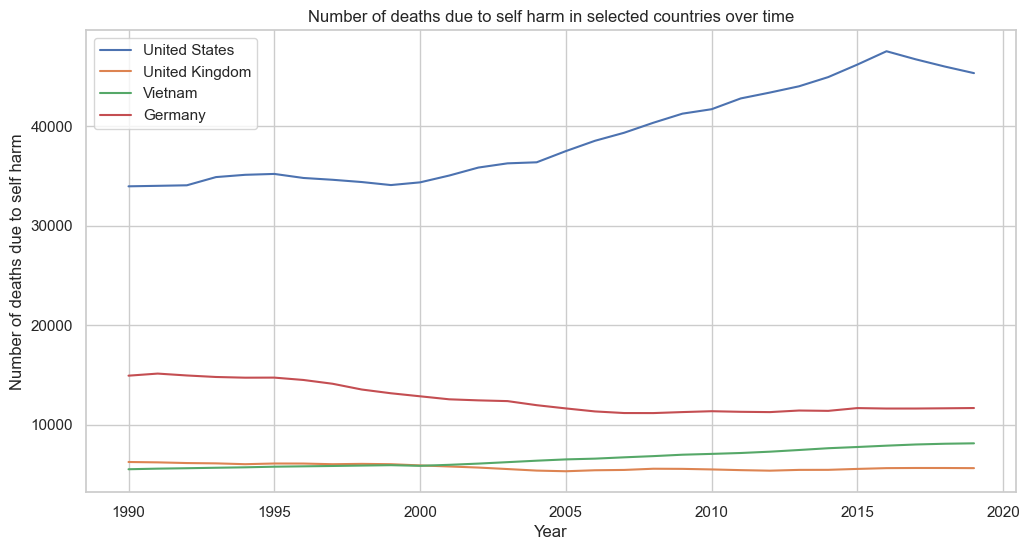

In [27]:
# Chọn nguyên nhân gây tử vong cần phân tích
cause_of_death = 'Self harm'

# Chọn các quốc gia cần so sánh
countries = ['United States', 'United Kingdom', 'Vietnam', 'Germany']

# Tạo DataFrame mới chứa thông tin cần thiết
df_countries_selected = df_countries[df_countries['Entity'].isin(countries)]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries_selected[df_countries_selected['Entity'] == country]
    plt.plot(data['Year'], data[cause_of_death], label=country)

plt.xlabel('Year')
plt.ylabel('Number of deaths due to self harm')
plt.title('Number of deaths due to self harm in selected countries over time')
plt.legend()
plt.grid(True)
plt.show()


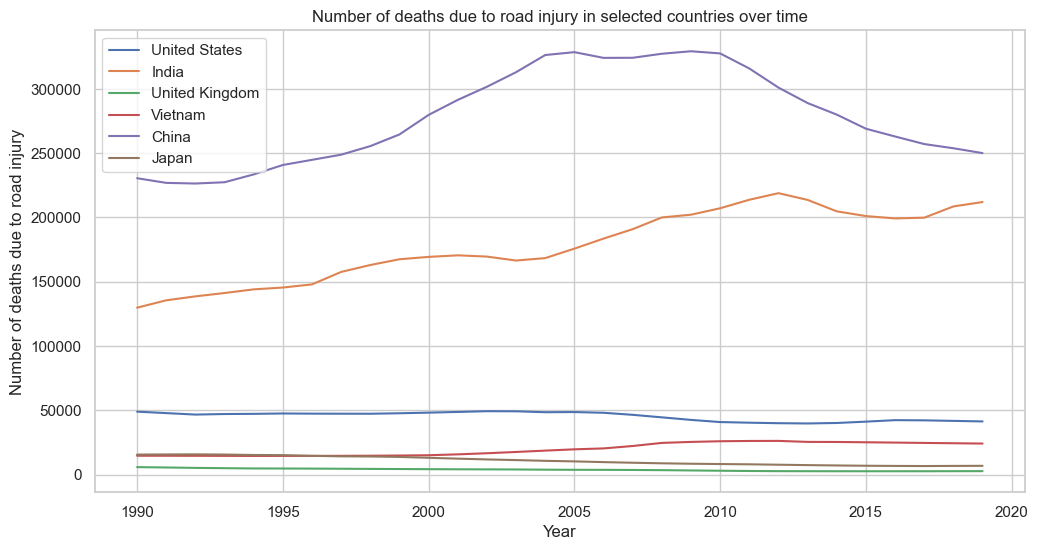

In [28]:
# Chọn nguyên nhân gây tử vong cần phân tích
cause_of_death = 'Road injury'

# Chọn các quốc gia cần so sánh
countries = ['United States', 'India', 'United Kingdom', 'Vietnam', 'China','Japan']

# Tạo DataFrame mới chứa thông tin cần thiết
df_countries_selected = df_countries[df_countries['Entity'].isin(countries) & (df_countries['Year'] >= 1990)]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_countries_selected[df_countries_selected['Entity'] == country]
    plt.plot(data['Year'], data[cause_of_death], label=country)

plt.xlabel('Year')
plt.ylabel('Number of deaths due to road injury')
plt.title('Number of deaths due to road injury in selected countries over time')
plt.legend()
plt.grid(True)
plt.show()